In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('cluster.csv')

In [4]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,1
197,198,Male,32,126,74,4
198,199,Male,32,137,18,1


In [5]:
data.drop('Cluster_group',axis=1,inplace=True)

In [6]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
#Make it as X feature using iloc
X=data.iloc[:,[3,4]].values

In [8]:
#Elbow method
from sklearn.cluster import KMeans
list1=[]
for i in range(1,11):
    Kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    Kmeans.fit(X)
    list1.append(Kmeans.inertia_)

In [9]:
list1

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37265.86520484347,
 30259.65720728547,
 25095.703209997548,
 21830.041978049438,
 20736.679938924124]

<function matplotlib.pyplot.show(*args, **kw)>

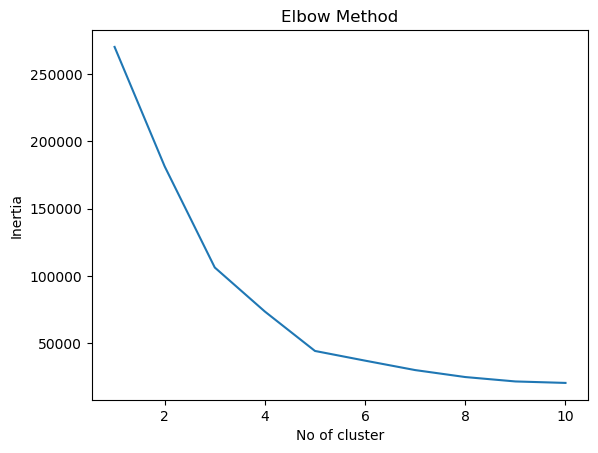

In [10]:
plt.plot(range(1,11),list1)
plt.title('Elbow Method')
plt.xlabel('No of cluster')
plt.ylabel('Inertia')
plt.show#

In [11]:
#Select cluster inertia start to decrease at lower rate
from sklearn.cluster import KMeans
Kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
y_Kmeans=Kmeans.fit_predict(X)

In [12]:
y_Kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [13]:
unsupervised_alg=data

In [14]:
unsupervised_alg['Cluster_group']=y_Kmeans

In [15]:
unsupervised_alg

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


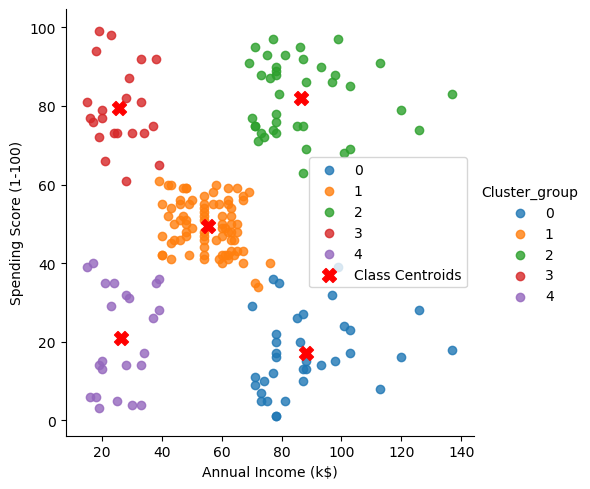

In [16]:
sns.lmplot(data=unsupervised_alg,x=unsupervised_alg.columns[3],y=unsupervised_alg.columns[4],hue=unsupervised_alg.columns[5],facet_kws={'legend_out': True},fit_reg=False)
means=unsupervised_alg.groupby(unsupervised_alg.columns[5]).mean()
plt.scatter(means[unsupervised_alg.columns[3]], means[unsupervised_alg.columns[4]], color='red', marker='X', s=100, label='Class Centroids')
plt.legend()
plt.show()

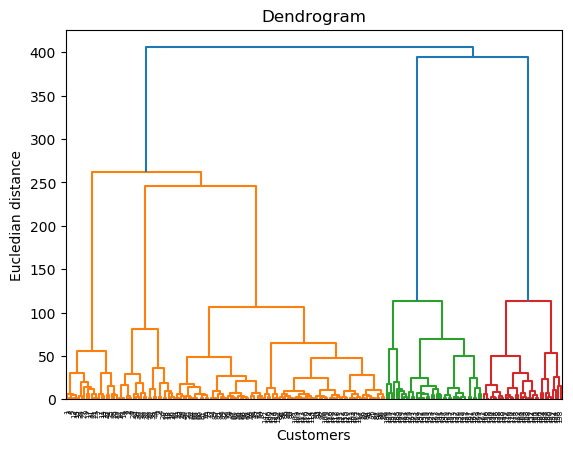

In [17]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Eucledian distance')
plt.show()

In [18]:
from sklearn.cluster import AgglomerativeClustering

In [19]:
clu_model=AgglomerativeClustering(n_clusters=5)

In [20]:
label_Agglo=clu_model.fit_predict(X)

In [21]:
unsupervised_alg['Cluster_Agg']=label_Agglo

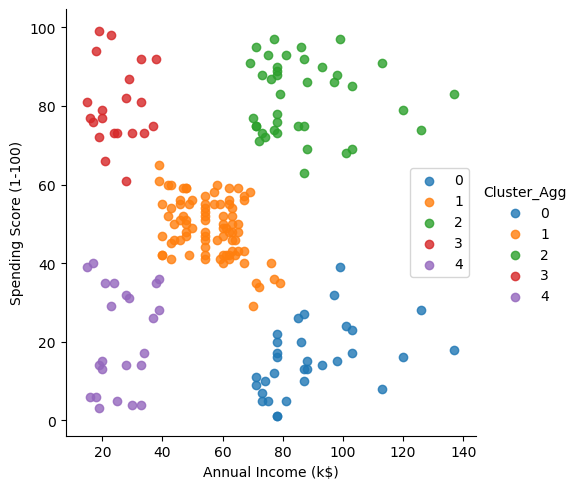

In [25]:
sns.lmplot(data=unsupervised_alg,x=unsupervised_alg.columns[3],y=unsupervised_alg.columns[4],hue=unsupervised_alg.columns[6],facet_kws={'legend_out': True},fit_reg=False)

plt.legend()
plt.show()